In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from PCIst import pci_st # https://github.com/renzocom/PCIst

# zatím pevné nastavení, experimenty později
par = {'baseline_window':(-100,0), 'response_window':(0,1000),'k': 1.2, 'n_steps':100} 

In [86]:
x=np.array([0,1,2,3,4])

print(pci_st.dimension_embedding(x,2,2),"\n")
print(pci_st.dimension_embedding(x,3,2),"\n")
print(pci_st.dimension_embedding(x,2,1),"\n")

[[2. 3. 4.]
 [0. 1. 2.]] 

[[4.]
 [2.]
 [0.]] 

[[1. 2. 3. 4.]
 [0. 1. 2. 3.]] 



In [87]:
def pci_channels_noise(values,n_channels,noise_div,base_zero=False):
    data = np.tile(values,(n_channels,1))

    noise = np.random.rand(data.shape[0],data.shape[1])
    data_with_noise = data + (noise*2-1)/noise_div
    if base_zero:
        data_with_noise[:,:len(times_base)] = 0


    fig, axs = plt.subplots(n_channels)

    for i,d in enumerate(data_with_noise):
        axs[i].plot(times,d)
    plt.show()
    
    print(pci_st.calc_PCIst(data_with_noise, times, **par))

In [88]:
times_base = np.array(range(-100,0))
values_base = np.zeros(times_base.shape)
times_val = np.array(range(0,1000))
times = np.concatenate([times_base,times_val])

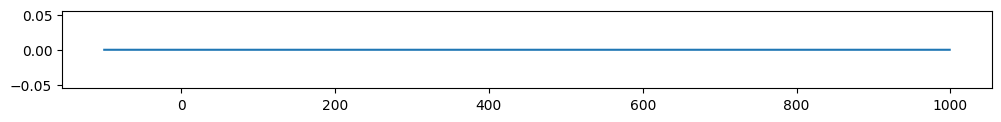

In [89]:
const = np.zeros(times_val.shape)
values = np.concatenate([values_base,const])

plt.figure(figsize=(12,1))
sns.lineplot(x=times,y=values)
plt.show()

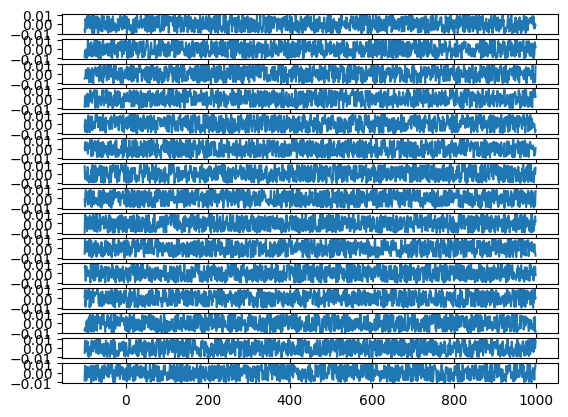

160.18200000000002


In [90]:
pci_channels_noise(values,15,100) # hodnoty PCI náhodně, jak zrovna vyjde noise

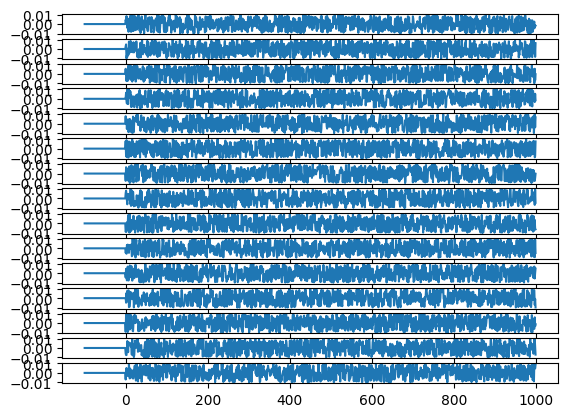

6736.563


In [92]:
pci_channels_noise(values,15,100,base_zero=True) # hodně vysoké PCI

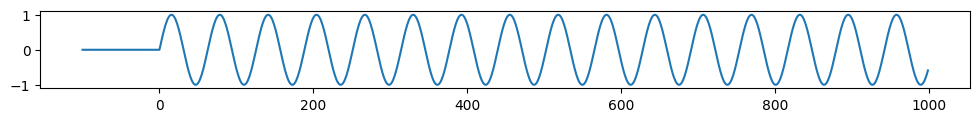

In [97]:
sinus = np.sin(times_val/10)
values_sin = np.concatenate([values_base,sinus])

plt.figure(figsize=(12,1))
sns.lineplot(x=times,y=values_sin)
plt.show()

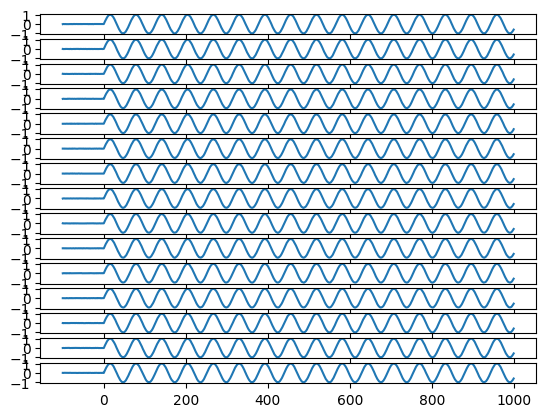

56.333


In [94]:
pci_channels_noise(values_sin,15,100)

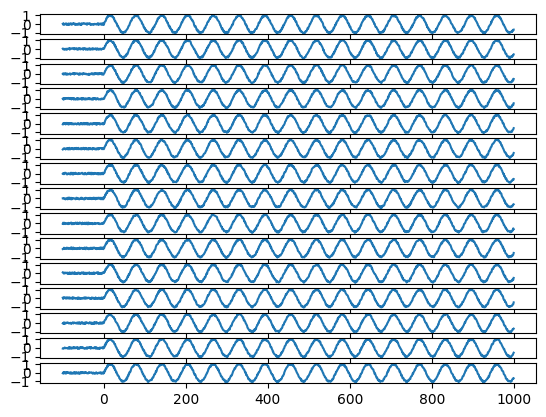

55.377


In [95]:
pci_channels_noise(values_sin,15,10)

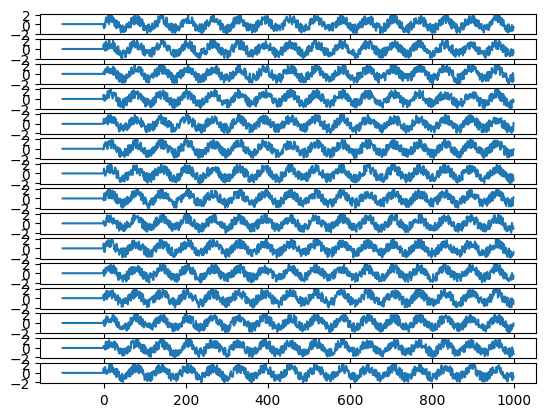

/auto/brno2/home/katterrina/__venv__/lib/python3.9/site-packages/PCIst/pci_st.py:132: RuntimeWarning: divide by zero encountered in divide
  snrs = np.sqrt(resp_power / base_power)


6476.3060000000005


In [99]:
pci_channels_noise(values_sin,15,1)